<a href="https://colab.research.google.com/github/ridvanyigit/Tensorflow-2.0/blob/main/Object_Classification_with_VGG16_VGG19_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to use `Pre-Trained VGG16 and VGG19 Models` to predict object
The VGG Network architecture was introduced by Simonyan and Zisserman in their 2014 paper, Very Deep Convolutional Networks for Large Scale Image Recognition

This network is characterized by its simplicity, using only 3x3 convolutional layers stacked on top of each other in increasing depth. Reducing volume size is handled by max pooling. Two fully-connected layers, each with 4.096 nodes are then followed by softmax classifier.

In 2014, 16 and 19 layer networks were considered very deep (although we now have the ResNet architecture which can be successfully trained at depths of 50-200 for ImageNet and over 1,000 for CIFAR-10)

Due to its depth and number of fully-connected nodes, VGG is over 533MB for VGG16 and 574MB for VGG19.

### VGG16 Model
---
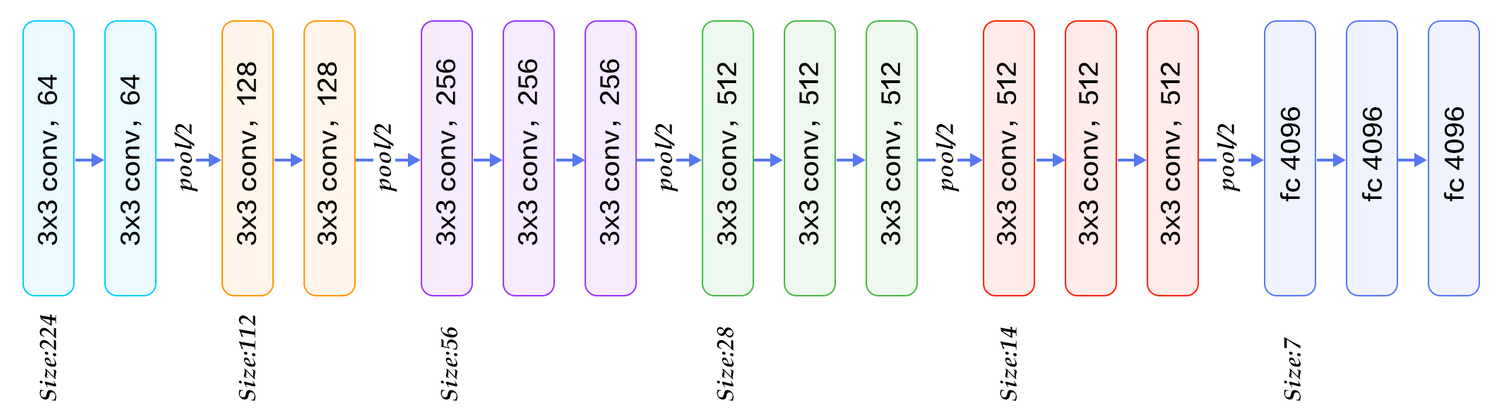

---
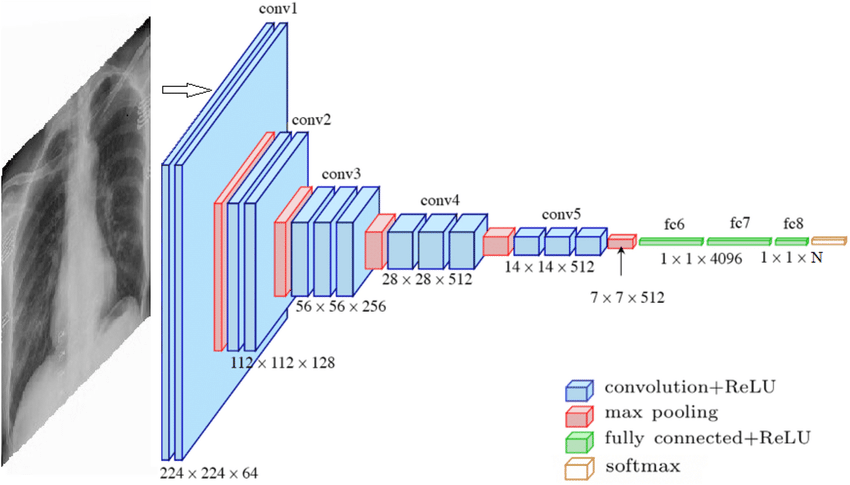

---


In [58]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

In [59]:
from google.colab import drive
drive.mount('/content/drive')

pics_path = '/content/drive/MyDrive/pics'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## VGG16

In [60]:
model = VGG16()

In [61]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
for file in os.listdir(pics_path):
    # Process only image files
    if file.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        print(file)
        full_path = os.path.join(pics_path, file)

        try:
            image = load_img(full_path, target_size=(224, 224))
            image = img_to_array(image)
            image = np.expand_dims(image, axis=0) # Add batch dimension
            image = preprocess_input(image)
            y_pred = model.predict(image)
            label = decode_predictions(y_pred, top=1)
            print(label)
            print()
        except Exception as e:
            print(f"Error processing {file}: {e}")

Brille.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step
[[('n03759954', 'microphone', np.float32(0.122750916))]]

Pen.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
[[('n02783161', 'ballpoint', np.float32(0.8405116))]]

Mouse.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n03793489', 'mouse', np.float32(0.9401943))]]

Wasser.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n04557648', 'water_bottle', np.float32(0.9468266))]]

Monitor.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
[[('n09229709', 'bubble', np.float32(0.12782818))]]

Wallet.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
[[('n04548362', 'wallet', np.float32(0.8524789))]]



## VGG19

In [64]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [65]:
model = VGG19()

In [66]:
model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
for file in os.listdir(pics_path):
    # Process only image files
    if file.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        print(file)
        full_path = os.path.join(pics_path, file)

        try:
            image = load_img(full_path, target_size=(224, 224))
            image = img_to_array(image)
            image = np.expand_dims(image, axis=0)  # Add batch dimension
            image = preprocess_input(image)
            y_pred = model.predict(image)
            label = decode_predictions(y_pred, top=1)
            print(label)
            print()
        except Exception as e:
            print(f"Error processing {file}: {e}")

Brille.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n03692522', 'loupe', np.float32(0.18137585))]]

Pen.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
[[('n02783161', 'ballpoint', np.float32(0.7846501))]]

Mouse.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step
[[('n03793489', 'mouse', np.float32(0.9683431))]]

Wasser.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step
[[('n04557648', 'water_bottle', np.float32(0.8497798))]]

Monitor.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
[[('n04330267', 'stove', np.float32(0.14079891))]]

Wallet.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step
[[('n04548362', 'wallet', np.float32(0.8306899))]]



# Using `Pre-Trained EfficientNet Models` for Object Prediction

EfficientNet, introduced by Tan and Le (2019) in their paper ["EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks"](https://arxiv.org/abs/1905.11946), efficiently scales CNNs along depth, width, and resolution using a compound scaling method guided by neural architecture search.  

Key features include:

*   **Compound Scaling:**  Balances network depth, width, and resolution.
*   **MBConv Blocks:**  Uses Mobile Inverted Bottleneck Convolution blocks for efficiency.
*   **Squeeze-and-Excitation:**  Dynamically recalibrates channel-wise feature responses.

The EfficientNet family (B0-B7) offers a trade-off between accuracy and computational cost. EfficientNet-B0 is smaller and faster, while EfficientNet-B7 is larger and more accurate. EfficientNet models provide a superior balance between accuracy, efficiency, and model size compared to older architectures like VGG. EfficientNetB0 weights are around 29MB.

---

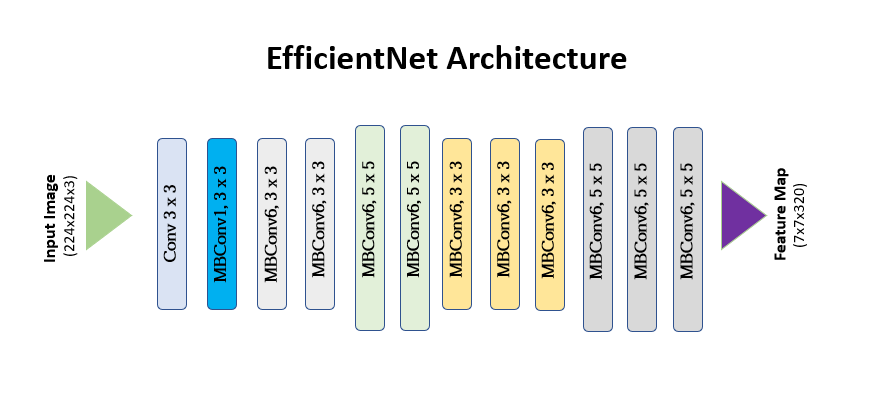

---



## Running the `EfficientNet model` by loading the dataset from `Google Drive`

In [68]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions

In [69]:
model = efficientnet.EfficientNetB0(weights='imagenet')

In [70]:
model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 224, 224, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 5,330,571 (20.33 MB)

 Trainable params: 5,288,548 (20.17 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [71]:
from google.colab import drive
drive.mount('/content/drive')

pics_path = '/content/drive/MyDrive/pics'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
for file in os.listdir(pics_path):
    # Process only image files
    if file.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        print(file)
        full_path = os.path.join(pics_path, file)

        try:
            image = load_img(full_path, target_size=(224, 224))
            image = img_to_array(image)
            image = np.expand_dims(image, axis=0)  # (1, 224, 224, 3)
            image = preprocess_input(image)
            y_pred = model.predict(image)
            label = decode_predictions(y_pred, top=1)
            print(label)
            print()
        except Exception as e:
            print(f"Error processing {file}: {e}")

Brille.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[('n04355933', 'sunglass', np.float32(0.5203425))]]

Pen.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
[[('n02783161', 'ballpoint', np.float32(0.671344))]]

Mouse.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[[('n03793489', 'mouse', np.float32(0.99710816))]]

Wasser.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
[[('n04557648', 'water_bottle', np.float32(0.88848525))]]

Monitor.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
[[('n03782006', 'monitor', np.float32(0.2790927))]]

Wallet.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[('n04548362', 'wallet', np.float32(0.9935649))]]



## Running the `EfficientNet Model` by loading the dataset from `GitHub`

In [73]:
import os
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions

In [74]:
model = efficientnet.EfficientNetB0(weights='imagenet')

In [75]:
github_repo_url = "https://github.com/ridvanyigit/All-Datasets/tree/main/pics"

In [76]:
file_names = [
    "Brille.png",
    "Monitor.jpeg",
    "Mouse.jpeg",
    "Pen.jpeg",
    "Wallet.jpeg",
    "Wasser.jpeg",
]

In [77]:
pics_path = "pics"
if not os.path.exists(pics_path):
    os.makedirs(pics_path)

In [78]:
for file_name in file_names:

    raw_file_url = f"https://raw.githubusercontent.com/ridvanyigit/All-Datasets/main/pics/{file_name}"

    try:
        response = requests.get(raw_file_url)
        response.raise_for_status()
        image_data = BytesIO(response.content)
        image = Image.open(image_data)


        file_path = os.path.join(pics_path, file_name)
        image.save(file_path)
        print(f"'{file_name}' downloaded and saved to '{pics_path}'")


        try:
            image = load_img(file_path, target_size=(224, 224))
            image = img_to_array(image)
            image = np.expand_dims(image, axis=0)
            image = preprocess_input(image)
            y_pred = model.predict(image)
            label = decode_predictions(y_pred, top=1)
            print(f"Prediction: {label}")
            print()
        except Exception as e:
            print(f"Error: Could not classify '{file_name}' - {e}")


    except requests.exceptions.RequestException as e:
        print(f"Error: Could not download or save '{file_name}' - {e}")

print("Process completed.")

'Brille.png' downloaded and saved to 'pics'
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: [[('n04355933', 'sunglass', np.float32(0.5203425))]]

'Monitor.jpeg' downloaded and saved to 'pics'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Prediction: [[('n03782006', 'monitor', np.float32(0.3354192))]]

'Mouse.jpeg' downloaded and saved to 'pics'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Prediction: [[('n03793489', 'mouse', np.float32(0.99653))]]

'Pen.jpeg' downloaded and saved to 'pics'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Prediction: [[('n02783161', 'ballpoint', np.float32(0.63979936))]]

'Wallet.jpeg' downloaded and saved to 'pics'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Prediction: [[('n04548362', 'wallet', np.float32(0.9946674))]]

'Wasser.jpeg' downloaded and saved to 'pics'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Prediction: [[('n04557648', 'water_bottle', np.float32(0.8775858))]]

Process completed.
